# Alcoholic Students 

## Defining the question 

### a) Specifying the question 

We would like to predict whether a particular student would fail

### b) Defining the metric for success 

We would consider an accuracy score greater than 80 % would be ideal. 

### c) Understanding the context 

The data were obtained in a survey of students math and portuguese language courses in
secondary school. It contains a lot of interesting social, gender and study information about students.
We will be using it to predict whether the student is likely to fail or not. 

### d) Recording the experimental design 

We shall use the following steps to help us achieve our goal 
1.   Reading the dataset
2.   Checking the dataset 
1.   Cleaning the dataset 
1.   Exploratory Data Analysis 
2.   Feature Engineering 
1.   Implementing the solution 
2.   Challenging the soloution 
1.   Recording our findings 






## Reading the data 

In [1]:
# installing the necessary libraries not in google colab
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

     - 38.3MB 639kB/s
     |████████████████████████████████| 81kB 4.0MB/s 
     |████████████████████████████████| 1.1MB 9.9MB/s 
     |████████████████████████████████| 3.2MB 26.9MB/s 
     |████████████████████████████████| 61kB 6.2MB/s 
     |████████████████████████████████| 81kB 7.9MB/s 
     |████████████████████████████████| 296kB 37.1MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.12.0-py2.py3-none-any.whl size=243829 sha256=2ffeb226361692b175bff75afbed679e2de955906af5ccb715ff46a03556e0f4
  Stored in directory: /tmp/pip-ephem-wheel-cache-i_1kdaup/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27085 sha256=9a2507d2c8bab0e7c6dea8e1bec4138365891d07000524c5321a692a3499b78c
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107413 sha256=1

In [2]:
! pip install tensorflow

In [3]:
# Let us first import all the libraries we will need for our analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from pandas_profiling import ProfileReport
from scipy import stats
from scipy.stats import norm
from scipy.stats import t
import math
from scipy.stats import ttest_ind
import statsmodels.api as sm
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
from tensorflow.keras.layers import Dense
from keras.models import Sequential 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# Importing the time series dataset to be used in the research
student_mat = pd.read_csv("/content/Student_Data.csv")
student_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


## Data Checking

In [5]:
# Checking the top 5 records in our dataset 
student_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [6]:
# Checking the bottom 5 records in our dataset 
student_mat.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3,2,3,3,3,5,5,8,9,9


In [7]:
# Checking the number of columns and records 
student_mat.shape

(395, 33)

In [8]:
# Checking the datatypes in the dataset 
student_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

## Data Cleaning 

### General data cleaning 

In [9]:
# checking for null values
student_mat.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [10]:
# checking for duplicates
student_mat.duplicated().sum()

0

In [11]:
# checking the column names to lower case
student_mat.columns = student_mat.columns.str.lower()
student_mat.head()

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [12]:
# Getting a binary code for whether the student has failed or not 
student_mat['failed']=student_mat['failures'].apply(lambda x : True if (x >2) else False)

In [13]:
student_mat.drop('failures',axis=1,inplace=True)

In [14]:
# Changing it to numbers 
student_mat['failed'].replace('False',1,inplace=True)
student_mat['failed'].replace('True',0,inplace=True)

### Outliers and Anomalies 

In [15]:
# # Checking for outliers 
# fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6)) = plt.subplots(3,2, figsize=(20, 7))
# fig.suptitle('Boxplots')
# sns.boxplot(df['age'], ax=ax1)
# sns.boxplot(df['TSH'], ax=ax2)
# sns.boxplot(df['T3'], ax=ax3)
# sns.boxplot(df['TT4'], ax=ax4)
# sns.boxplot(df['T4U'], ax=ax5)
# sns.boxplot(df['FTI'], ax=ax6)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

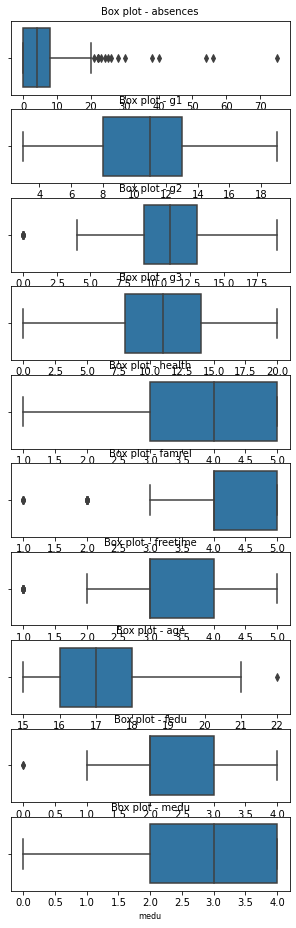

In [16]:
# Checking for outliers in the columns with numerical data
col_names = ['absences','g1', 'g2', 'g3', 'health', 'famrel', 'freetime', 'age', 'fedu', 'medu']

fig, ax = plt.subplots(len(col_names), figsize=(5,16))

for i, col_val in enumerate(col_names):
    sns.boxplot(student_mat[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
plt.show()

In [17]:
# checking for anomalities
Q1 = student_mat.quantile(0.25)

Q3 = student_mat.quantile(0.75)

IQR = Q3 - Q1
IQR

age           2.0
medu          2.0
fedu          1.0
traveltime    1.0
studytime     1.0
famrel        1.0
freetime      1.0
goout         2.0
dalc          1.0
walc          2.0
health        2.0
absences      8.0
g1            5.0
g2            4.0
g3            6.0
failed        0.0
dtype: float64

In [18]:
# Removing the outliers

student_mat1 = student_mat[~((student_mat < (Q1 - 1.5 * IQR)) |(student_mat > (Q3 + 1.5 * IQR))).any(axis=1)]
student_mat1.head()

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3,failed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,False
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,False
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,False
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,False
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15,False


## Exploratory Analysis 

### Univariate Analysis 

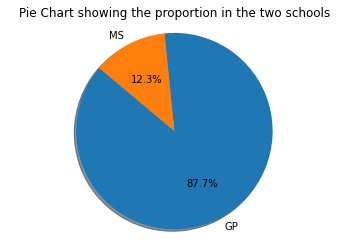

In [19]:
vals = student_mat1.school.value_counts()
names = ['GP','MS']
plt.pie(vals, labels = names, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Pie Chart showing the proportion in the two schools')
plt.show()

In [20]:
print(student_mat['higher'].value_counts())
print(student_mat['sex'].value_counts())

yes    375
no      20
Name: higher, dtype: int64
F    208
M    187
Name: sex, dtype: int64


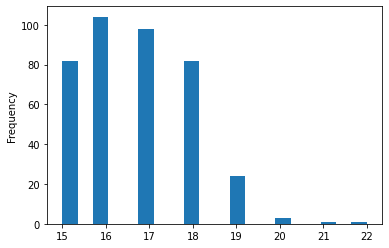

In [21]:
student_mat['age'].plot.hist(bins=20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



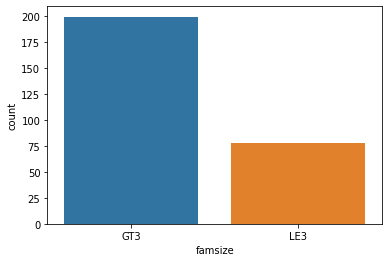

In [22]:
#Getting the family size that drinks the most 
sns.countplot(student_mat1['famsize'])

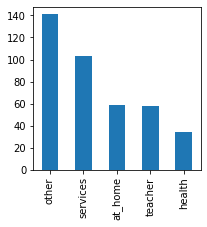

In [23]:
plt.figure(figsize = (3,3))
student_mat['mjob'].value_counts().plot.bar()

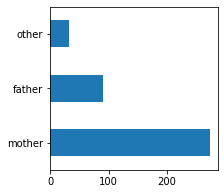

In [24]:
plt.figure(figsize = (3,3))
student_mat.guardian.value_counts().plot(kind = 'barh')

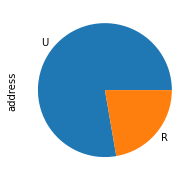

In [25]:
plt.figure(figsize = (3,4))
student_mat.address.value_counts().plot(kind = 'pie')

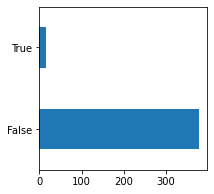

In [28]:
plt.figure(figsize = (3,3))
student_mat.failed.value_counts().plot(kind = 'barh')

<BarContainer object of 395 artists>

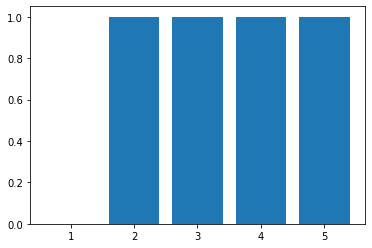

In [82]:
#Looking to see if the people that have the most freetime drink the most 
plt.bar(student_mat['freetime'],student_mat['failed'])

<BarContainer object of 395 artists>

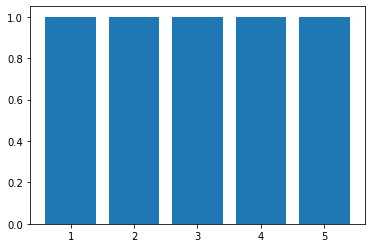

In [83]:
#Getting to see if students the students that go out alot fail 
plt.bar(student_mat['goout'],student_mat['failed'])

In [33]:
# Diving the dataset to train and test
X = student_mat[[ 'age', 'medu', 'fedu',
       'traveltime', 'studytime',
       'failed','famrel', 'freetime', 'goout', 'dalc',
       'walc', 'health', 'absences', 'g1', 'g2', 'g3']].values

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



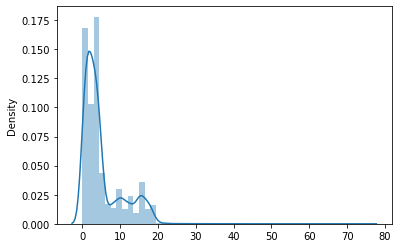

In [34]:
sns.distplot(X)

In [35]:
# describing the data
student_mat.describe()

,age,medu,fedu,traveltime,studytime,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


#### Univariate findings 

*   GP has more students that are alcoholics compared to MS 
*   Most of the students want to pursue higher education. 
*   Most of the alcoholic students are females 
*   THe most notorious age for alcoholism is 16 and 17 
*   Families that are greater than 3 hold a higher possiblity of having an alcoholic child. 
*   We also find that families with the mother as the guardian are more likely to be alcoholic. 
*   We also find that most of the kids who are alcoholic come from urban homes. 
*   We also see most of the students dont fail. 
*   We have also observed that more freetime doesnt neccessarily mean worse grades . however those with less free time seem to be failing. 
*   We also see that going out often doesnt affect the grades of the alcoholic students. 



### Bivariate 

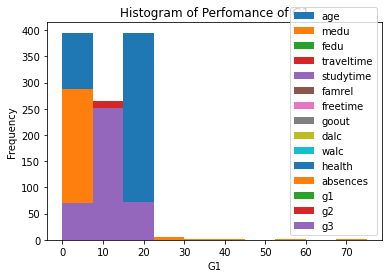

In [36]:
# ploting the histogram on g1.
student_mat.plot.hist()
plt.title('Histogram of Perfomance of G1')
plt.ylabel('Frequency')
plt.xlabel('G1')
plt.show()

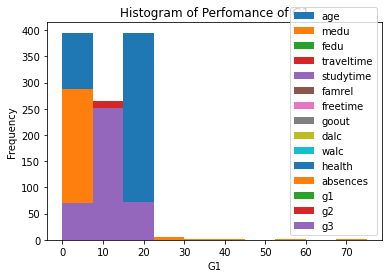

In [37]:
# ploting the histogram on g1.
student_mat.plot.hist()
plt.title('Histogram of Perfomance of G1')
plt.ylabel('Frequency')
plt.xlabel('G1')
plt.show()

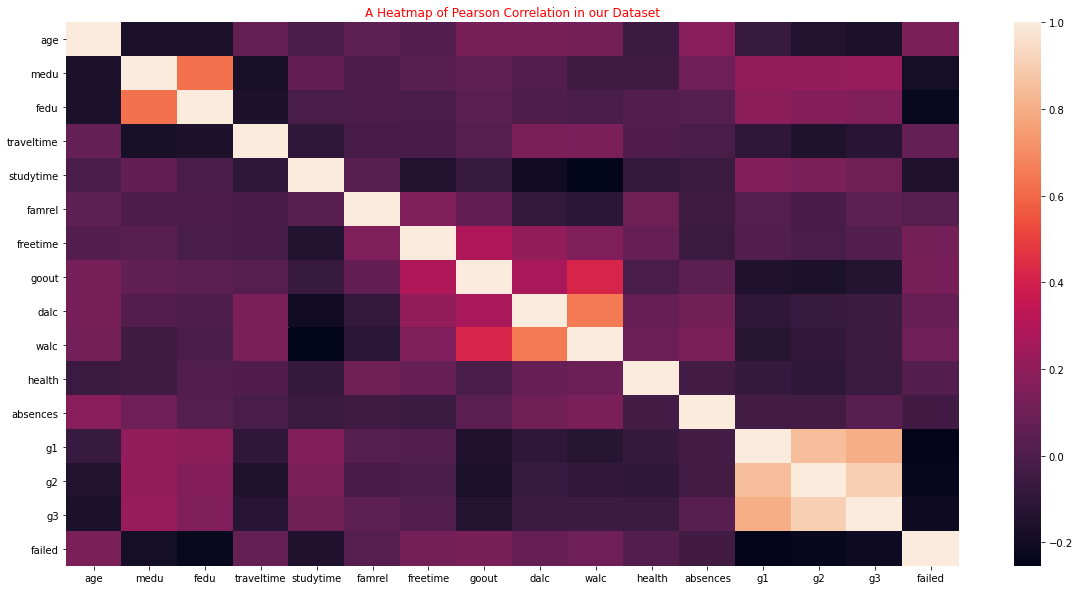

In [38]:
# Calculating the pearson coefficient correlation
plt.figure(figsize = (20,10))
sns.heatmap(student_mat.corr(),annot=False)
plt.title('A Heatmap of Pearson Correlation in our Dataset', color='red')
plt.show()

### Multivariate Analysis 

In [39]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
student_mat['school']= label_encoder.fit_transform(student_mat['school']) 
student_mat['sex']= label_encoder.fit_transform(student_mat['sex']) 
student_mat['address']= label_encoder.fit_transform(student_mat['address']) 
student_mat['famsize']= label_encoder.fit_transform(student_mat['famsize']) 
student_mat['pstatus']= label_encoder.fit_transform(student_mat['pstatus']) 
student_mat['mjob']= label_encoder.fit_transform(student_mat['mjob'])
student_mat['fjob']= label_encoder.fit_transform(student_mat['fjob']) 
student_mat['reason']= label_encoder.fit_transform(student_mat['reason'])  
student_mat['guardian']= label_encoder.fit_transform(student_mat['guardian']) 
student_mat['schoolsup']= label_encoder.fit_transform(student_mat['schoolsup']) 
student_mat['famsup']= label_encoder.fit_transform(student_mat['famsup']) 
student_mat['paid']= label_encoder.fit_transform(student_mat['paid'])
student_mat['activities']= label_encoder.fit_transform(student_mat['activities'])
student_mat['nursery']= label_encoder.fit_transform(student_mat['nursery'])  
student_mat['internet']= label_encoder.fit_transform(student_mat['internet']) 
student_mat['higher']= label_encoder.fit_transform(student_mat['higher'])
student_mat['romantic']= label_encoder.fit_transform(student_mat['romantic'])
student_mat['school']= label_encoder.fit_transform(student_mat['school'])  

In [42]:
# Diving the dataset to train and test
X = student_mat[['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
        'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'dalc',
       'walc', 'health', 'absences', 'g1', 'g2', 'g3']].values
y = student_mat['failed'].values

In [43]:
# The following code divides data into test sets by using 20% of the data
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [44]:
# Feature scaling
# We now need to perform feature scaling. We execute the following code to do so:
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [45]:
# perfoming the LDA
#
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
lda_ = lda.fit(X_train, y_train)
X_test = lda.transform(X_test)

In [46]:
lda_.coef_

array([[-0.3264922 , -0.27670906,  0.63803233, -0.01862688, -0.32526552,
        -0.624888  , -0.59112141, -0.63439602, -0.1621658 ,  0.4099037 ,
        -0.23334598,  0.65696009,  0.08846726, -0.34876018, -0.16953121,
        -0.12993719, -0.33469362, -0.09828791, -0.24578488, -0.28018826,
         0.00384292, -0.47550714,  0.25731807,  0.35280998,  0.43298271,
         0.65709906, -0.08662958, -0.1400941 , -0.22539049, -1.32795431,
        -0.25193427,  1.08338793]])

In [47]:
df = pd.DataFrame(X,columns=['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
        'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'dalc',
       'walc', 'health', 'absences', 'g1', 'g2', 'g3'])

In [49]:
f_imp = pd.DataFrame(index=df.columns.values, data=lda_.coef_[0].T)
f_imp.sort_values(0,ascending=False)

,0
g3,1.083388
dalc,0.657099
guardian,0.656960
age,0.638032
goout,0.432983
fjob,0.409904
freetime,0.352810
famrel,0.257318
traveltime,0.088467
internet,0.003843


### Multivariate findings 

We see that the following columns positevely contribute to the target varaible namely : 
g3, dalc , guardian, age, goout, fjob, freetime, famrel, traveltime, internet. 
The one negatively contributing to the target variable are : 
address, walc, activities, famsup, health , mjob , schoolsup, abscences, reason , nursery , g2, sex , higher, famsize, school , paid, studytime, roantic, medu , pstatus, fedu, g1. In descending order. 

## Feature Engineering 

In [64]:
student_mat.head()

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3,failed
0,0,0,18,1,0,0,4,4,0,4,0,1,2,2,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6,False
1,0,0,17,1,0,1,1,1,0,2,0,0,1,2,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6,False
2,0,0,15,1,1,1,1,1,0,2,2,1,1,2,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10,True
3,0,0,15,1,0,1,4,2,1,3,1,1,1,3,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15,False
4,0,0,16,1,0,1,3,3,2,2,1,0,1,2,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10,False


In [65]:
# Making a new column with the average of the grades to prevent multicolinearity 
student_mat['average_grades'] = (student_mat['g1'] + student_mat['g2'] + student_mat['g3'])/3

In [66]:
# Dropping the other columns 
student_mat.drop(['g1','g2','g3'],axis=1,inplace=True)

In [67]:
# Confirming the columns have been dropped 
student_mat.head()

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,dalc,walc,health,absences,failed,average_grades
0,0,0,18,1,0,0,4,4,0,4,0,1,2,2,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,False,5.666667
1,0,0,17,1,0,1,1,1,0,2,0,0,1,2,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,False,5.333333
2,0,0,15,1,1,1,1,1,0,2,2,1,1,2,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,True,8.333333
3,0,0,15,1,0,1,4,2,1,3,1,1,1,3,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,False,14.666667
4,0,0,16,1,0,1,3,3,2,2,1,0,1,2,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,False,8.666667


In [68]:
# Selecting the features and labels 
X = student_mat.drop('failed',axis=1)
y = student_mat['failed']

In [69]:
# We deal with class imbalance by over sampling 
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

x_ros, y_ros = ros.fit_resample(X, y)
print(x_ros.shape,y_ros.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



(758, 30) (758,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.2, random_state=0)

In [71]:
print(X_train.shape,y_train.shape)

(606, 30) (606,)


In [72]:
print(X_train.shape,y_train.shape)

(606, 30) (606,)


## Implementing the soloution using neural networks 

In [73]:
# Creating our model
mlp = MLPClassifier()

# fitting the data
mlp.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [74]:
# Predicting
y_pred = mlp.predict(X_test)

# Evaluation
print(confusion_matrix(y_test,y_pred))

print('-----------------------------------------')

print(classification_report(y_test,y_pred))

[[67  5]
 [ 0 80]]
-----------------------------------------
              precision    recall  f1-score   support

       False       1.00      0.93      0.96        72
        True       0.94      1.00      0.97        80

    accuracy                           0.97       152
   macro avg       0.97      0.97      0.97       152
weighted avg       0.97      0.97      0.97       152



In [86]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,True,True
1,False,False
2,False,False
3,False,False
4,True,True
...,...,...
147,True,True
148,True,True
149,True,True
150,False,False


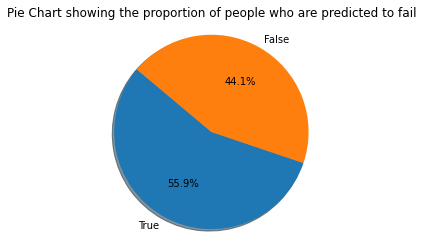

In [90]:
vals = df['Predicted'].value_counts()
names = ['True','False']
plt.pie(vals, labels = names, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Pie Chart showing the proportion of people who are predicted to fail')
plt.show()

## Challenging the solution using tensor flow 

We are going to use Keras to define a neural network that will be trained off this data 

In [75]:
classifier= Sequential()
classifier.add(Dense(units=16,activation='relu',input_dim = 30))
classifier.add(Dense(units=8,activation= 'relu'))
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dense(units=1,activation='sigmoid'))


Once the neural network is defined we specify the optimizer and loss function 

In [76]:
classifier.compile(optimizer= 'rmsprop',loss= 'binary_crossentropy')

We now train the data using the classifier.fit passing it into the training data 

In [77]:
classifier.fit(X_train,y_train,batch_size=1,epochs=50)

Epoch 1/50
606/606 [==============================] - 1s 950us/step - loss: 0.6717
Epoch 2/50
606/606 [==============================] - 1s 1ms/step - loss: 0.4214
Epoch 3/50
606/606 [==============================] - 1s 1ms/step - loss: 0.3726
Epoch 4/50
606/606 [==============================] - 1s 960us/step - loss: 0.3512
Epoch 5/50
606/606 [==============================] - 1s 1ms/step - loss: 0.3499
Epoch 6/50
606/606 [==============================] - 1s 974us/step - loss: 0.2845
Epoch 7/50
606/606 [==============================] - 1s 1000us/step - loss: 0.2508
Epoch 8/50
606/606 [==============================] - 1s 982us/step - loss: 0.2442
Epoch 9/50
606/606 [==============================] - 1s 1ms/step - loss: 0.2171
Epoch 10/50
606/606 [==============================] - 1s 998us/step - loss: 0.1982
Epoch 11/50
606/606 [==============================] - 1s 970us/step - loss: 0.2101
Epoch 12/50
606/606 [==============================] - 1s 966us/step - loss: 0.1951
Epoch 13

In [78]:
y_pred_tens = classifier.predict(X_test)
y_pred_tens = [1 if y>= 0.5 else 0 for y in y_pred]

In [81]:
# Evaluation
print(confusion_matrix(y_test,y_pred_tens))

print('-----------------------------------------')

print(classification_report(y_test,y_pred_tens))

[[67  5]
 [ 0 80]]
-----------------------------------------
              precision    recall  f1-score   support

       False       1.00      0.93      0.96        72
        True       0.94      1.00      0.97        80

    accuracy                           0.97       152
   macro avg       0.97      0.97      0.97       152
weighted avg       0.97      0.97      0.97       152



## Recommendation

We see we get the same results from both the models, and we see the people who are predicted to fail have increased more than significantly. 
We have met our goal, which was to get an accuracy score of greater than 80 % this means our model is good. Making it better would cause over fitting which would make it not perform well in the real world. 